# Project for Module 4: Perceptron and Gradient Descent

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

# Notebook Imports and Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [3]:
def f(x):
    return x ** 2 + x + 1

In [4]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

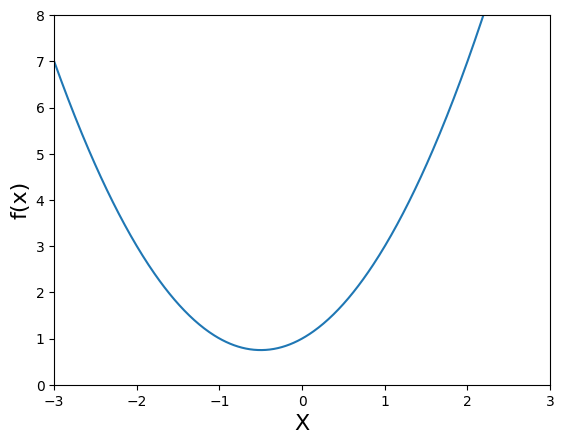

In [5]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [6]:
def df(x):
    return 2 * x + 1

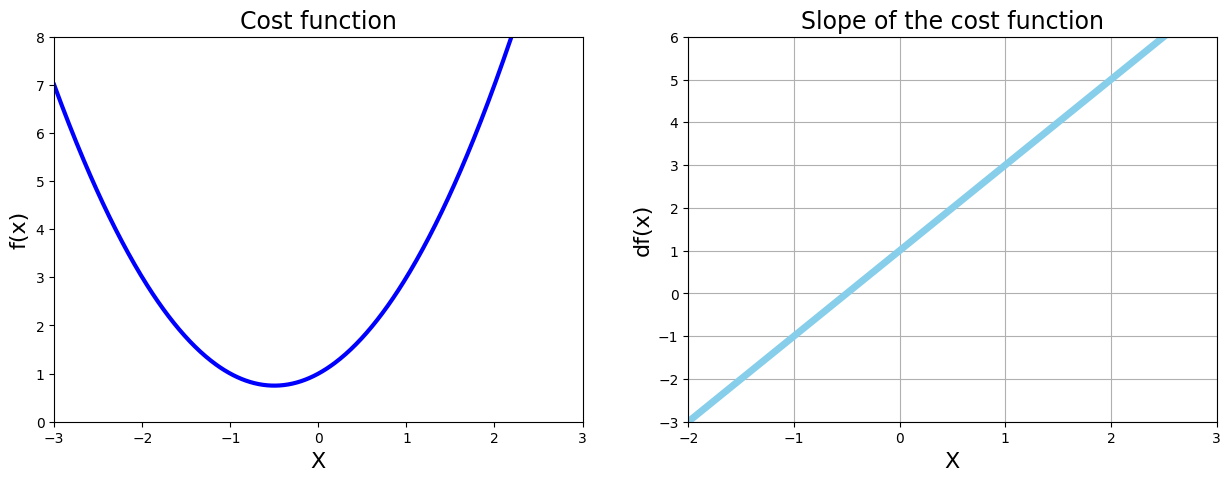

In [7]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [9]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Gradient Descent
##########################
##########################

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED] Calculate the gradient (slope of the function at the current point)
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED] Update new_x using the gradient descent formula

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # [REQUIRED] Calculate the slope at the new_x point

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


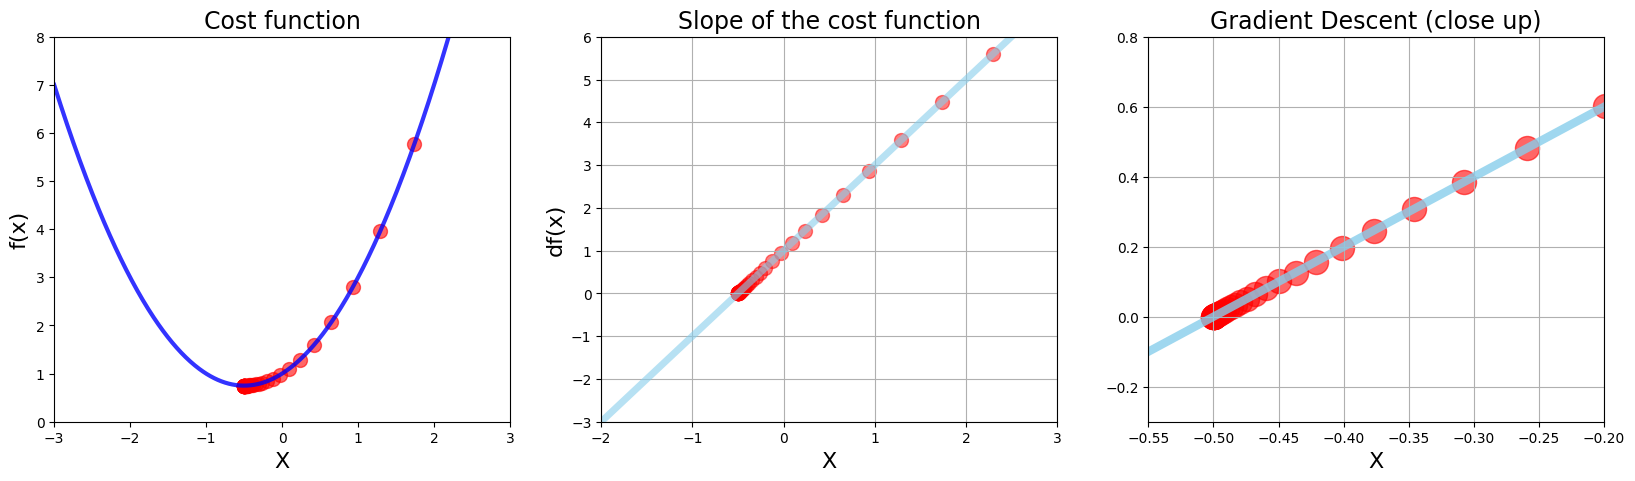

In [10]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [12]:
##########################
##########################

import numpy as np

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return np.sin(x) + np.cos(x)  # [REQUIRED] Define your function here

def dg(x):
    return np.cos(x) - np.sin(x)  # [REQUIRED] Define the derivative of your function here


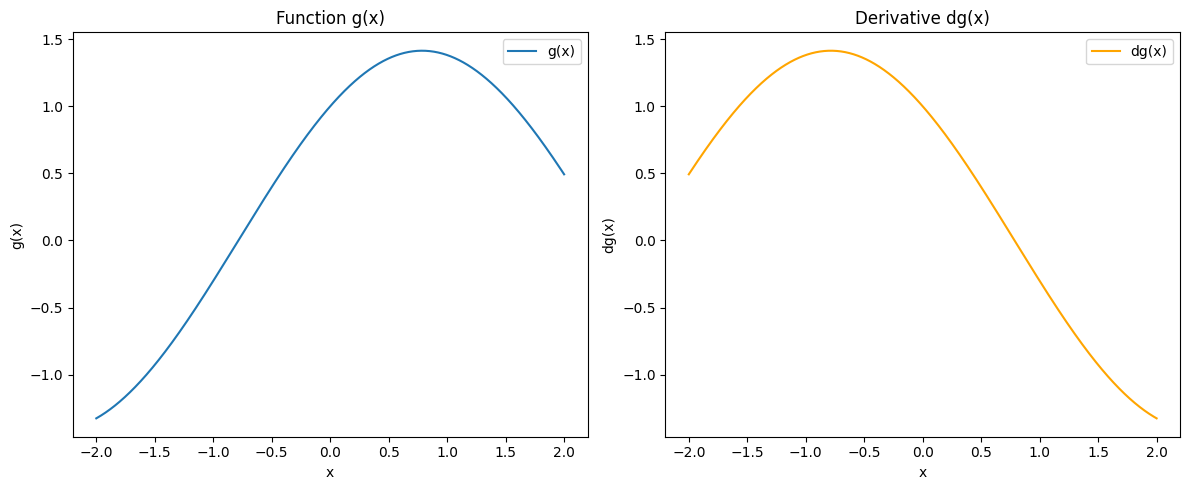

In [13]:
## TASK-3 : Plot function and derivative side by side like has been done earlier
import numpy as np
import matplotlib.pyplot as plt

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return np.sin(x) + np.cos(x)  # [REQUIRED] Define your function here

def dg(x):
    return np.cos(x) - np.sin(x)  # [REQUIRED] Define the derivative of your function here

# Plotting the function g(x)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), label='g(x)')
plt.title('Function g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

# Plotting the derivative dg(x)
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), label='dg(x)', color='orange')
plt.title('Derivative dg(x)')
plt.xlabel('x')
plt.ylabel('dg(x)')
plt.legend()

plt.tight_layout()
plt.show()


## Gradient Descent

In [14]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [15]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -2.322594281285123
Number of steps: 213


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -2.3186868831994674
Number of steps: 301


In [17]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -2.3223160021618052
Number of steps: 170


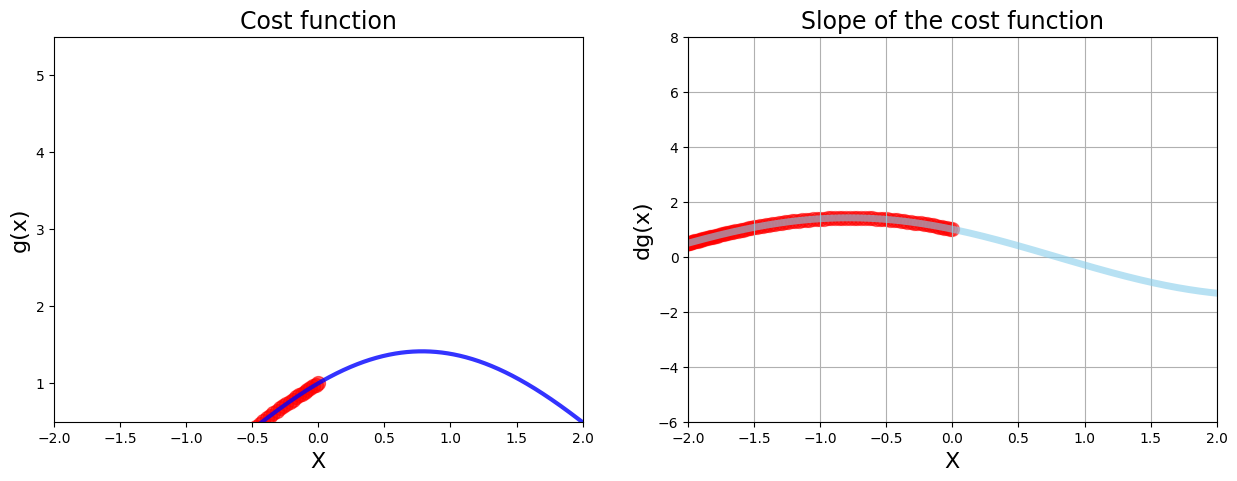

In [18]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

Loop ran this many times: 36


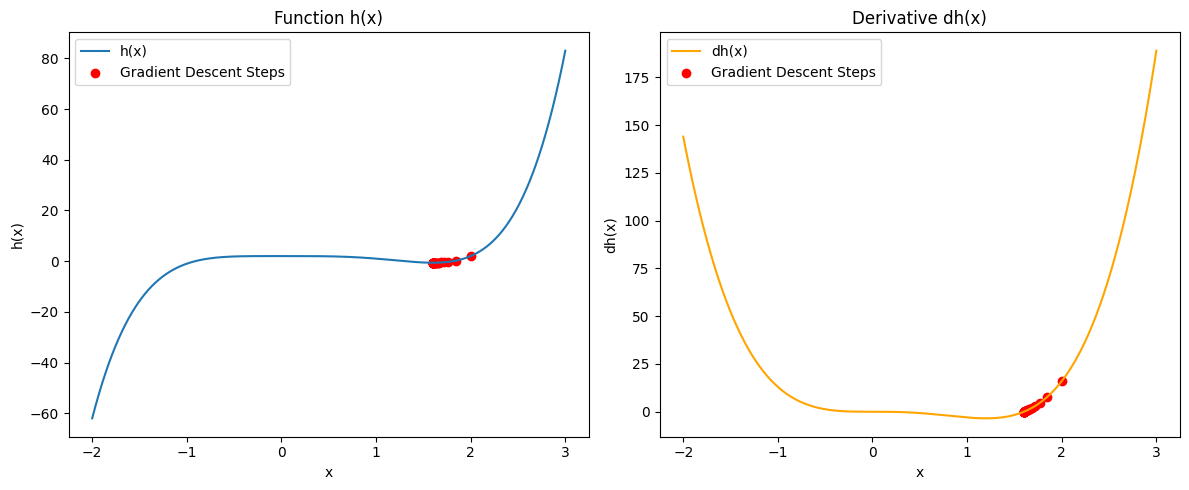

Local minimum occurs at: 1.6000379821501218
h(x) value at this point is: -0.6214399852266279


In [19]:
## TASK-4 : Code the same things as they were done for the first two examples
import numpy as np
import matplotlib.pyplot as plt

##########################
##########################

# Function h(x) and its derivative dh(x)
def h(x):
    return x**5 - 2*x**4 + 2  # [REQUIRED] Define your function here

def dh(x):
    return 5*x**4 - 8*x**3  # [REQUIRED] Define the derivative of your function here

# Gradient Descent
def gradient_descent(initial_x, learning_rate, precision, max_iter):
    x = initial_x
    x_list = [x]
    slope_list = [dh(x)]

    for n in range(max_iter):
        gradient = dh(x)  # [REQUIRED] Calculate the gradient (slope of the function at the current point)
        x = x - learning_rate * gradient  # [REQUIRED] Update x using the gradient descent formula

        step_size = abs(learning_rate * gradient)
        x_list.append(x)
        slope_list.append(dh(x))  # [REQUIRED] Calculate the slope at the new_x point

        if step_size < precision:
            print('Loop ran this many times:', n)
            break

    return x, x_list, slope_list

# Initial values
initial_x = 2
learning_rate = 0.01
precision = 0.00001
max_iter = 500

# Run gradient descent
minimizer, x_vals, slope_vals = gradient_descent(initial_x, learning_rate, precision, max_iter)

# Plotting the function h(x)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x_range = np.linspace(-2, 3, 1000)
plt.plot(x_range, h(x_range), label='h(x)')
plt.scatter(x_vals, h(np.array(x_vals)), color='red', label='Gradient Descent Steps')
plt.title('Function h(x)')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()

# Plotting the derivative dh(x)
plt.subplot(1, 2, 2)
plt.plot(x_range, dh(x_range), label='dh(x)', color='orange')
plt.scatter(x_vals, slope_vals, color='red', label='Gradient Descent Steps')
plt.title('Derivative dh(x)')
plt.xlabel('x')
plt.ylabel('dh(x)')
plt.legend()

plt.tight_layout()
plt.show()

print('Local minimum occurs at:', minimizer)
print('h(x) value at this point is:', h(minimizer))


# The Learning Rate

Loop ran this many times: 17


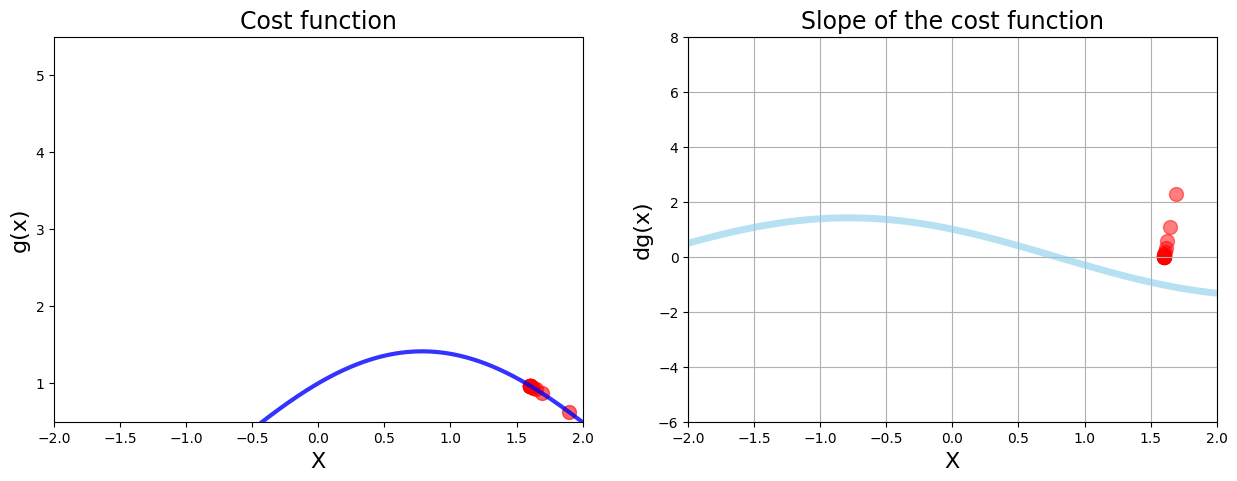

Number of steps is:  19


In [25]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(initial_x=1.9, learning_rate=0.02, precision=0.00001, max_iter=500)

# Plot function and derivative and scatter plot side by side
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))


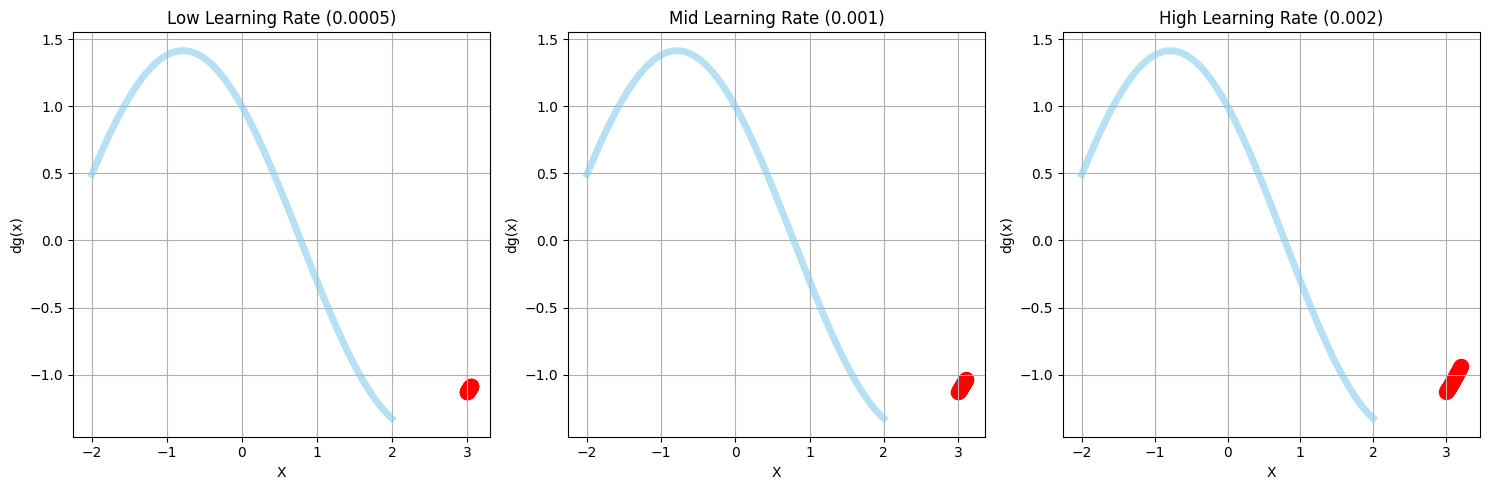

In [26]:
# Function to run gradient descent
def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    x = initial_guess
    x_list = [x]
    deriv_list = [derivative_func(x)]

    for n in range(max_iter):
        x = x - multiplier * derivative_func(x)
        x_list.append(x)
        deriv_list.append(derivative_func(x))

        if abs(multiplier * derivative_func(x)) < precision:
            break

    return x_list, deriv_list

# Run gradient descent with different learning rates
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)  # [REQUIRED]

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)  # [REQUIRED]

insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting the results
plt.figure(figsize=[15, 5])

# Low gamma
plt.subplot(1, 3, 1)
plt.title('Low Learning Rate (0.0005)')
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(low_gamma[0], low_gamma[1], color='red', s=100, alpha=0.5)

# Mid gamma
plt.subplot(1, 3, 2)
plt.title('Mid Learning Rate (0.001)')
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(mid_gamma[0], mid_gamma[1], color='red', s=100, alpha=0.5)

# High gamma
plt.subplot(1, 3, 3)
plt.title('High Learning Rate (0.002)')
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(high_gamma[0], high_gamma[1], color='red', s=100, alpha=0.5)

plt.tight_layout()
plt.show()


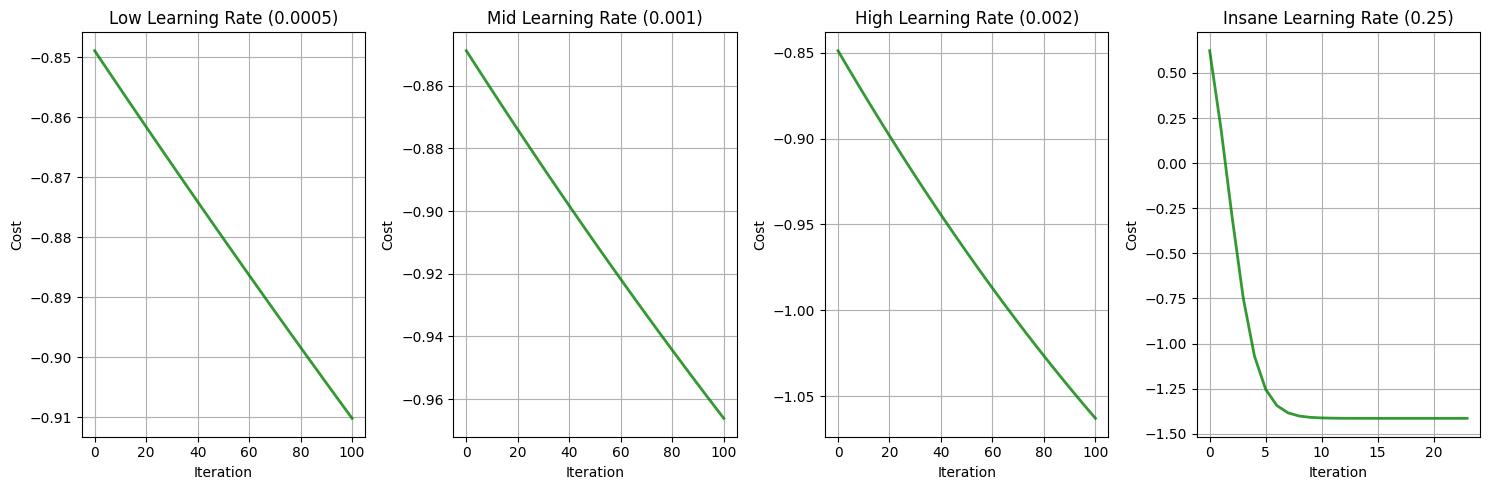

In [28]:
# Function to run gradient descent and calculate cost at each iteration
def gradient_descent_with_cost(derivative_func, cost_func, initial_guess, multiplier, precision, max_iter):
    x = initial_guess
    x_list = [x]
    deriv_list = [derivative_func(x)]
    cost_list = [cost_func(x)]

    for n in range(max_iter):
        x = x - multiplier * derivative_func(x)
        x_list.append(x)
        deriv_list.append(derivative_func(x))
        cost_list.append(cost_func(x))

        if abs(multiplier * derivative_func(x)) < precision:
            break

    return x_list, deriv_list, cost_list

# Run gradient descent with different learning rates and calculate cost at each iteration
n = 100

# Low gamma
low_gamma = gradient_descent_with_cost(derivative_func=dg, cost_func=g, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

# Mid gamma
mid_gamma = gradient_descent_with_cost(derivative_func=dg, cost_func=g, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

# High gamma
high_gamma = gradient_descent_with_cost(derivative_func=dg, cost_func=g, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Insane gamma
insane_gamma = gradient_descent_with_cost(derivative_func=dg, cost_func=g, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting the reduction in cost for each iteration
plt.figure(figsize=[15, 5])

# Low gamma
plt.subplot(1, 4, 1)
plt.title('Low Learning Rate (0.0005)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.plot(range(len(low_gamma[2])), low_gamma[2], color='green', linewidth=2, alpha=0.8)

# Mid gamma
plt.subplot(1, 4, 2)
plt.title('Mid Learning Rate (0.001)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.plot(range(len(mid_gamma[2])), mid_gamma[2], color='green', linewidth=2, alpha=0.8)

# High gamma
plt.subplot(1, 4, 3)
plt.title('High Learning Rate (0.002)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.plot(range(len(high_gamma[2])), high_gamma[2], color='green', linewidth=2, alpha=0.8)

# Insane gamma
plt.subplot(1, 4, 4)
plt.title('Insane Learning Rate (0.25)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.plot(range(len(insane_gamma[2])), insane_gamma[2], color='green', linewidth=2, alpha=0.8)

plt.tight_layout()
plt.show()


# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function 1: f(x, y) = 1/3 - x^2 - y^2 + 1
def f1(x, y):
    return 1/3 - x**2 - y**2 + 1

# Function 2: f(x, y) = 1/(3 - x^2 - y^2) + 1
def f2(x, y):
    r = 3 - x**2 - y**2
    return 1/r + 1

# Gradient of Function 1
def df1_dx(x, y):
    return -2 * x

def df1_dy(x, y):
    return -2 * y

# Gradient of Function 2
def df2_dx(x, y):
    r = 3 - x**2 - y**2
    return 2 * x / r**2

def df2_dy(x, y):
    r = 3 - x**2 - y**2
    return 2 * y / r**2

# Function to run gradient descent for 3D functions
def gradient_descent_3d(derivative_func_x, derivative_func_y, initial_x, initial_y, multiplier, precision, max_iter):
    x = initial_x
    y = initial_y
    x_list = [x]
    y_list = [y]
    z_list = [f1(x, y)]  # You can change this to f2(x, y) for the second function

    for n in range(max_iter):
        x = x - multiplier * derivative_func_x(x, y)
        y = y - multiplier * derivative_func_y(x, y)
        x_list.append(x)
        y_list.append(y)
        z_list.append(f1(x, y))  # Change this to f2(x, y) for the second function

        if abs(multiplier * derivative_func_x(x, y)) < precision and abs(multiplier * derivative_func_y(x, y)) < precision:
            break

    return x_list, y_list, z_list

# Run gradient descent for Function 1
initial_x1 = 2
initial_y1 = 2
multiplier1 = 0.1
precision1 = 0.00001
max_iter1 = 500

x_vals1, y_vals1, z_vals1 = gradient_descent_3d(df1_dx, df1_dy, initial_x1, initial_y1, multiplier1, precision1, max_iter1)

# Run gradient descent for Function 2
initial_x2 = 2
initial_y2 = 2
multiplier2 = 0.1
precision2 = 0.00001
max_iter2 = 500

x_vals2, y_vals2, z_vals2 = gradient_descent_3d(df2_dx, df2_dy, initial_x2, initial_y2, multiplier2, precision2, max_iter2)

# Plotting 3D charts
fig = plt.figure(figsize=(15, 5))

# Function 1
ax1 =


SyntaxError: ignored

In [30]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


TypeError: ignored

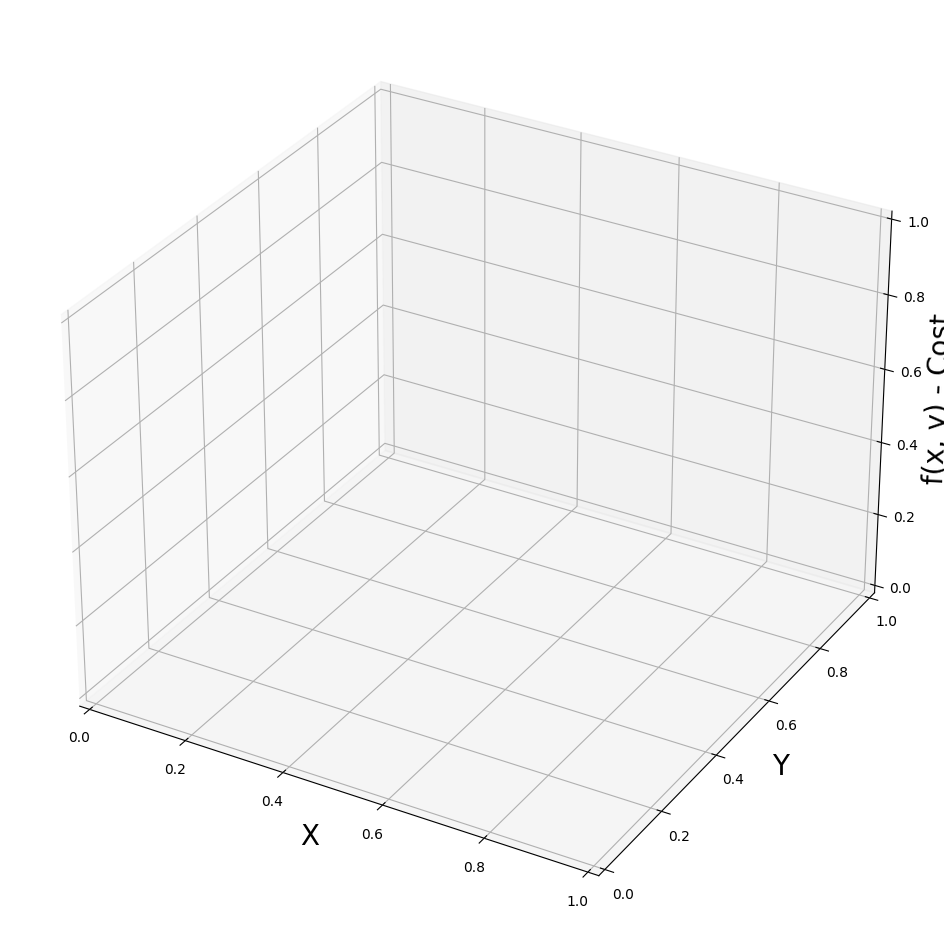

In [31]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

##########################
##########################

## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.

##########################
##########################

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = ## [REQUIRED]

## $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [33]:
from sympy import symbols, diff

# Define symbolic variables
a, b = symbols('x y')

# Define the cost function f(x, y)
f = 1/3 - a**2 - b**2 + 1  # [REQUIRED] Define your cost function here

# Calculate partial derivatives
partial_derivative_x = diff(f, a)  # [REQUIRED] Calculate the partial derivative with respect to x
partial_derivative_y = diff(f, b)  # [REQUIRED] Calculate the partial derivative with respect to y

# Print the results
print('Our cost function f(x, y) is: ', f)
print('Partial derivative wrt x is: ', partial_derivative_x)
print('Partial derivative wrt y is: ', partial_derivative_y)

# Evaluate the cost function and its partial derivative at specific values
value_at_point = f.evalf(subs={a: 1.8, b: 1.0})  # Python Dictionary
partial_derivative_at_point = partial_derivative_x.evalf(subs={a: 1.8, b: 1.0})

print('Value of f(x, y) at x=1.8, y=1.0 is: ', value_at_point)
print('Value of partial derivative wrt x at x=1.8, y=1.0 is: ', partial_derivative_at_point)


Our cost function f(x, y) is:  -x**2 - y**2 + 1.33333333333333
Partial derivative wrt x is:  -2*x
Partial derivative wrt y is:  -2*y
Value of f(x, y) at x=1.8, y=1.0 is:  -2.90666666666667
Value of partial derivative wrt x at x=1.8, y=1.0 is:  -3.60000000000000


## Batch Gradient Descent with SymPy

In [35]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess

# Define the cost function
f = 1/3 - a**2 - b**2 + 1

for n in range(max_iter):
    gradient_x = diff(f, a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f, b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f.evalf(subs={a: params[0], b: params[1]}))


Values in gradient array: [-1.16881096857237e+40 -6.49339426984649e+39]
Minimum occurs at x value of: 7.01286581143421e+39
Minimum occurs at y value of: 3.89603656190789e+39
The cost is: -6.43593877809059e+79


In [36]:
# Partial derivative functions example 4
def fpx(x, y):
    return -2 * x  # [REQUIRED] Calculate the partial derivative with respect to x

def fpy(x, y):
    return -2 * y  # [REQUIRED] Calculate the partial derivative with respect to y


In [40]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
# Use a different name for the cost function to avoid conflicts
cost_value = 1/3 - params[0]**2 - params[1]**2 + 1
print('The cost is:', cost_value)


Values in gradient array: [-1.16881097e+40 -6.49339427e+39]
Minimum occurs at x value of: 7.012865811434208e+39
Minimum occurs at y value of: 3.896036561907893e+39
The cost is: -6.435938778090586e+79


## Graphing 3D Gradient Descent

In [41]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  # initial guess
values_array = params.reshape(1, 2)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.vstack((values_array, params))

# Results
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
# Correct the cost calculation using the current values of params
cost_value = 1/3 - params[0]**2 - params[1]**2 + 1
print('The cost is:', cost_value)


Values in gradient array: [-2.05764507e+16 -1.14313615e+16]
Minimum occurs at x value of: 1.2345870427072304e+16
Minimum occurs at y value of: 6858816903929058.0
The cost is: -1.9946388592368145e+32


TypeError: ignored

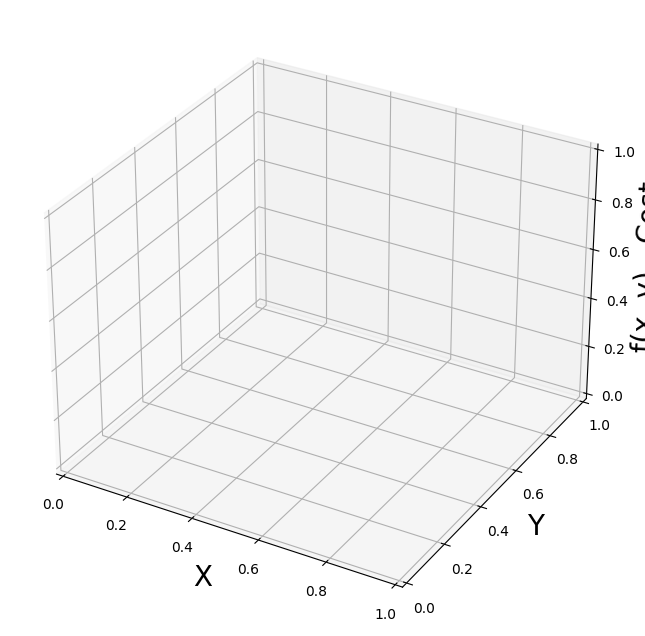

In [43]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for plotting
x_4 = np.linspace(-2, 2, 100)
y_4 = np.linspace(-2, 2, 100)
x_4, y_4 = np.meshgrid(x_4, y_4)

# Plot the cost function surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

# Scatter plot for parameter values during gradient descent
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()


### For Reference, practice and play with the code below

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [44]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [45]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


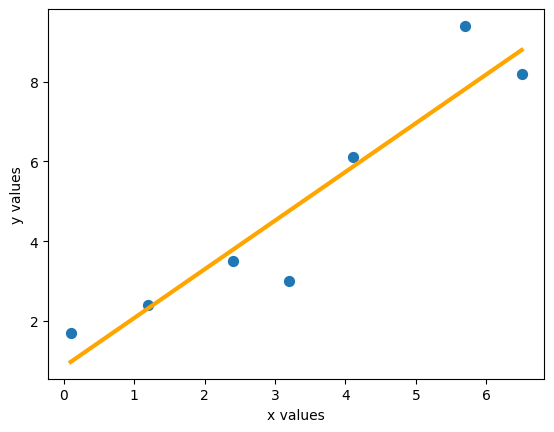

In [46]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [47]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [48]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [49]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [50]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [51]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


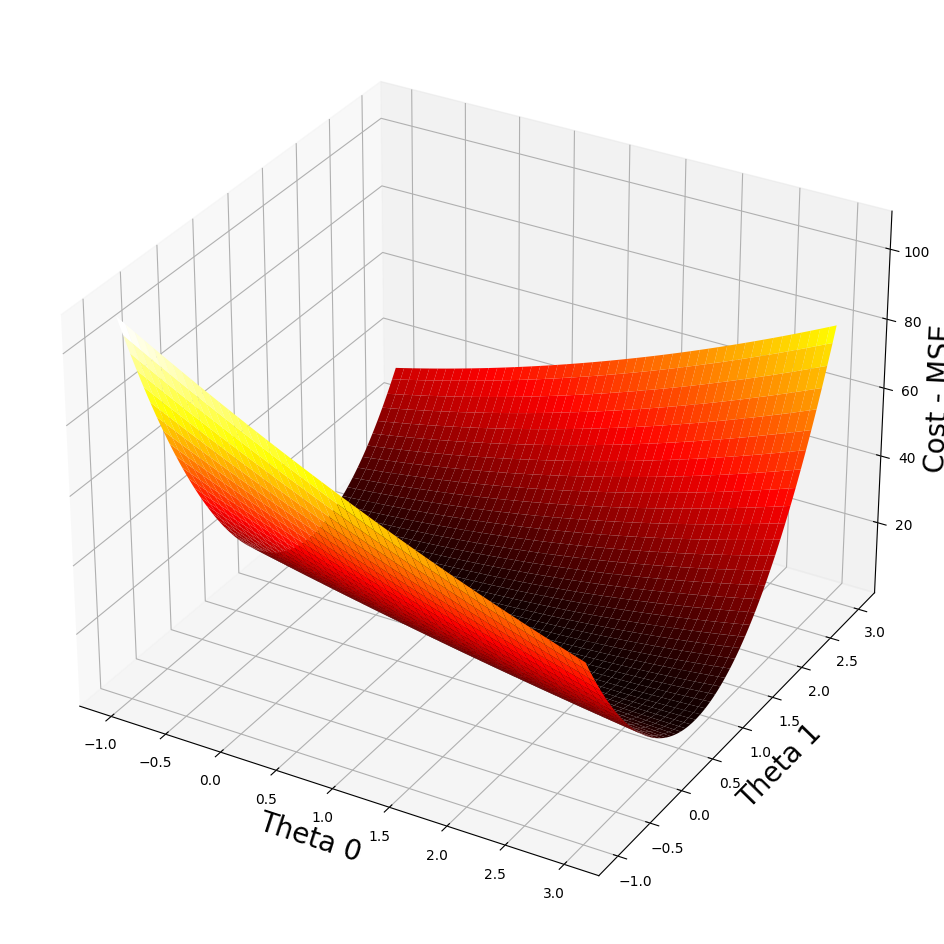

In [52]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [53]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [54]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [55]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


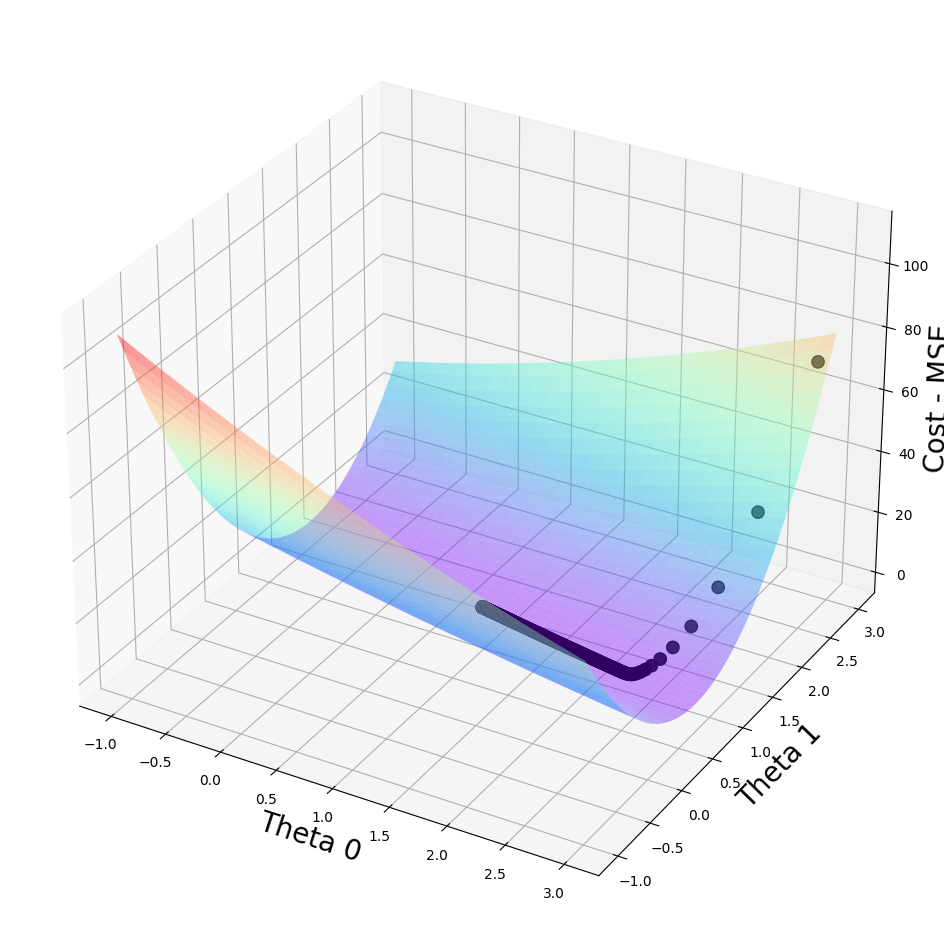

In [56]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()